# Learning Gate - Reto: Análisis de deserción de empleados con sus sistemas 
## Data Science Fundamentals - Data Manipulation using Pandas

### Importing Libraries

In [1]:
import os
import random
import pandas as pd
import glob
import numpy as np
import scipy as sci
import seaborn as sns
import matplotlib.pylab as plt
from IPython.display import display_html 

%matplotlib inline

### Loading Data

In [2]:
# Definiendo el path donde se localizan los archivos para el analisis
path = os.path.join(os.getcwd(), 'Data')
files = glob.glob(os.path.join(path, '*.csv'))

# Creando los dataframes
df_test   = pd.read_csv(os.path.join(path, 'Test.csv'))
df_test2  = pd.read_csv(os.path.join(path, 'Test2.csv'))
df_train  = pd.read_csv(os.path.join(path, 'Train.csv'))
df_train2 = pd.read_csv(os.path.join(path, 'Train2.csv'))

#### Pre-processing the Loaded Data

- ***Combining the Loaded Data***

In [3]:
# Combining similar data
df1 = pd.concat([df_train, df_test], ignore_index=True)
df2 = pd.concat([df_train2, df_test2], ignore_index=True)

# Joining the combined data to have a unique dataframe containing all the loaded data
df = pd.merge(df1, df2, on="Employee_ID")

- ***Fixing Issues with the generated DataFrame***

In [4]:
new_cols = {}
for col in df.columns:
    new_cols[col] = col.lstrip()
df.rename(columns=new_cols, inplace=True)

- ***Displaying characteristics of the loaded data***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                10000 non-null  object 
 1   Gender                     10000 non-null  object 
 2   Age                        9427 non-null   float64
 3   Education_Level            10000 non-null  int64  
 4   Relationship_Status        10000 non-null  object 
 5   Hometown                   10000 non-null  object 
 6   Unit                       10000 non-null  object 
 7   Decision_skill_possess     10000 non-null  object 
 8   Time_of_service            9804 non-null   float64
 9   Time_since_promotion       10000 non-null  int64  
 10  growth_rate                10000 non-null  int64  
 11  Travel_Rate                10000 non-null  int64  
 12  Post_Level                 10000 non-null  int64  
 13  Pay_Scale                  9988 non-null   floa

- ***Removing Missing Values***

*Missing values to be removed (represented by Naval Blue indicatros):*

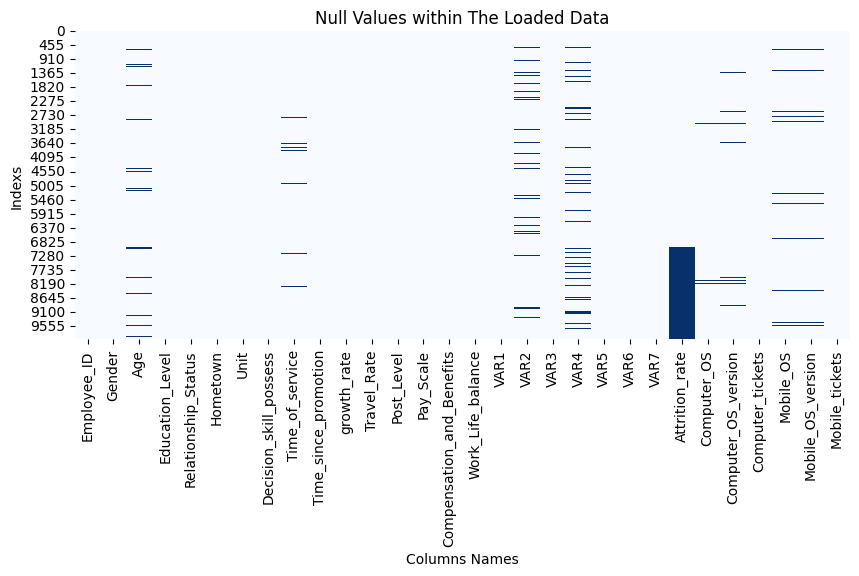

In [6]:
fig, ax = plt.subplots(figsize=(10,4))  
sns.heatmap(df.isnull(), cbar=False,cmap="Blues");
ax.set_title('Null Values within The Loaded Data');
ax.set_xlabel('Columns Names');
ax.set_ylabel('Indexs');

*Reemplazando Valores Nulos:*

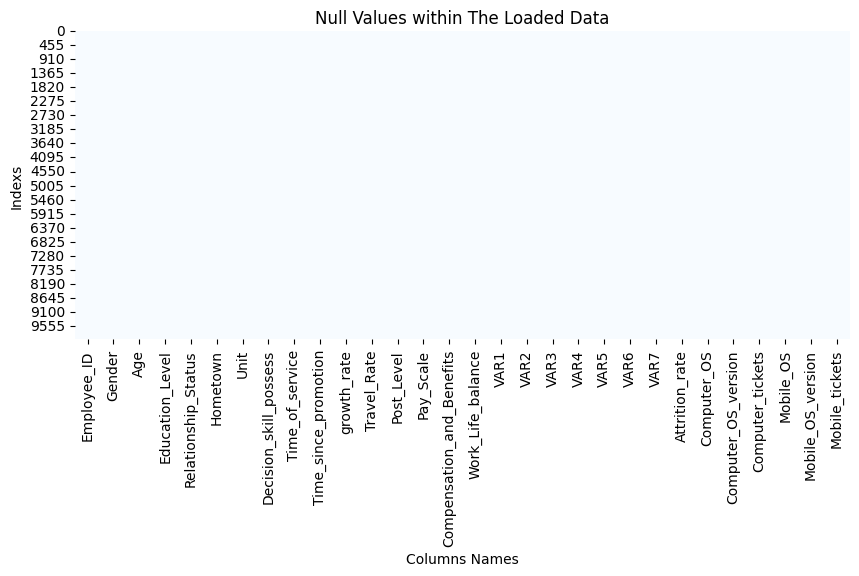

In [7]:
# reemplazo
df.fillna('No_Registrado', inplace=True)

# Comprobando el reemplazo:
fig, ax = plt.subplots(figsize=(10,4))  
sns.heatmap(df.isnull(), cbar=False,cmap="Blues");
ax.set_title('Null Values within The Loaded Data');
ax.set_xlabel('Columns Names');
ax.set_ylabel('Indexs');

### Exploratory Data Analysis

#### - ***El porcentaje de personas que usan Windows, Mac, Linux o "No registrado" como su sistema operativo en su computadora. Se esperan 4 renglones en esta respuesta***

In [8]:
df_DesOS = pd.DataFrame(df.Computer_OS.value_counts()/df.Computer_OS.value_counts().sum()).rename(columns={'count':'Porcentaje'})*100
display(df_DesOS)

,Porcentaje
Computer_OS,
Windows,77.28
MacOS,16.34
Linux,4.80
No_Registrado,1.58


#### - ***El porcentaje de personas que usan iOS, Android o "No registrado" como su sistema operativo en su dispositivo móvil. Se esperan 3 renglones en esta respuesta***

In [9]:
df_MobOS = pd.DataFrame(df.Mobile_OS.value_counts()/df.Mobile_OS.value_counts().sum()).rename(columns={'count':'Porcentaje'})*100
display(df_MobOS)

,Porcentaje
Mobile_OS,
Android,76.59
iOS,20.54
No_Registrado,2.87


#### - ***La edad promedio de la gente que utiliza cada sistema operativo de escritorio***

In [10]:
df_Age = df[df.Age!='No_Registrado'].groupby('Computer_OS')[['Age']].mean().rename(columns={'Age':'Edad_Promedio'})
display(df_Age)

,Edad_Promedio
Computer_OS,
Linux,40.451902
MacOS,40.396251
No_Registrado,40.52349
Windows,39.457441


#### - ***El nivel educativo promedio de la gente que utiliza cada sistema operativo de escritorio***

In [11]:
df_Edu = df.groupby('Computer_OS')[['Education_Level']].mean().rename(columns={'Education_Level':'Nivel_Educacion'})
display(df_Edu)

,Nivel_Educacion
Computer_OS,
Linux,3.243750
MacOS,3.168299
No_Registrado,3.177215
Windows,3.203675


#### - ***El número total de tickets generados por la gente, con cada sistema operativo de escritorio***

In [12]:
df_tkts = df.groupby('Computer_OS')[['Computer_tickets']].sum().rename(columns={'Education_Level':'Nivel_Educacion'})
display(df_tkts)

,Computer_tickets
Computer_OS,
Linux,254
MacOS,1880
No_Registrado,541
Windows,21169


### Results

#### - ***Guardando los Resultados***

In [13]:
#Envía el resultado de cada solicitud de información a un archivo .xlsx, donde el resultado de cada consulta esté en su propia hoja de trabajo. 

file_name = 'resultadosReto.xlsx'
path2save = os.path.join(os.getcwd(), 'Results', file_name)

WorkSheets = ['Desktop_OSs', 'Mobile_OSs', 'Ave_Ages', 'Ave_Edu', 'Raised_Tkts']

with pd.ExcelWriter(path2save) as writer:
    df_DesOS.to_excel(writer, sheet_name=WorkSheets[0], index=True)
    df_MobOS.to_excel(writer, sheet_name=WorkSheets[1], index=True)
    df_Age.to_excel(writer, sheet_name=WorkSheets[2], index=True)
    df_Edu.to_excel(writer, sheet_name=WorkSheets[3], index=True)
    df_tkts.to_excel(writer, sheet_name=WorkSheets[4], index=True)

# FIN